<a href="https://colab.research.google.com/github/Darpan9o1/Sentiment-Analysis/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install pandas
#!pip install tweepy
#!pip install vaderSentiment
!pip install requests_html


    100% |████████████████████████████████| 1.2MB 16.7MB/s 
    100% |████████████████████████████████| 71kB 25.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/34/e0/5d/070e22eceecf7ecd5fa4b86bbc18c1c7d0b90e02e9b57f35eb
  Stored in directory: /root/.cache/pip/wheels/11/ef/7a/b4e5692572b93ce67bb9d0680bc8e840ff9a21fab73a3bff56
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
Successfully built pyppeteer parse fake-useragent


In [0]:
import requests_html
session = requests_html.HTMLSession()

url='https://www.metacritic.com/'
r=session.get(url)
#headers={'User-Agent' :'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36'}
#response=requests.get(url,headers=headers)


In [3]:
top_games=r.html.xpath('//*[@id="frontdoor_carousel"]/ul/li[2]/div[1]/div/ol/li/div/a/span/text()')
top_games

['Devil May Cry 5', 'Metro Exodus', 'Dead or Alive 6', 'Anthem', 'Left Alive']

In [4]:
import tweepy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
pd.set_option('display.float_format','{:.3f}'.format)

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
#My Twitter API Authentication Variables
consumer_key = '9dz74DpmSM6sOCKXwCwhLvS1U'
consumer_secret = 'udjJMtJzX9Cf7xXnsVFICvDpCOSob99lmKYHeACul8AwelefHz'
access_token = '101421399-fF6vlY9H955qxTdNKRvg77Ksq3gjxw3MS92wNqqH'
access_token_secret = 'bzqsS6tznWs3rTQda6s0RCwgP04Btl31Ug1elSGMrb6Y0'

In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
data2 = pd.DataFrame([],columns=['Game','Tweets'])

#for game in top_games:
 # tweets = api.search(game, count=200)
  #data = pd.DataFrame(data=[game,tweet.text for tweet in tweets], columns=['Game','Tweets'])
  #data.append(zip(game,[tweet.text for tweet in tweets]))
  #data = data.append(pd.DataFrame({'Game':game,'Tweets':[tweet.text for tweet in tweets]}))
  #pd.DataFrame()

for game in top_games:
  tweets = api.search(game,count=500)
  data1 = pd.DataFrame({'Game':game,'Tweet time':[tweet.created_at for tweet in tweets],'User Name':[tweet.user.screen_name for tweet in tweets],'Likes count':[tweet.favorite_count for tweet in tweets],'Retweet count':[tweet.retweet_count for tweet in tweets],'Source':[tweet.source for tweet in tweets],'User Followers':[tweet.user.followers_count for tweet in tweets],'Tweets':[tweet.text for tweet in tweets]})
  data2 = data2.append(data1)


In [7]:
print(tweets)

[Status(_api=<tweepy.api.API object at 0x7f7b9a731c18>, _json={'created_at': 'Sun Mar 10 16:06:30 +0000 2019', 'id': 1104775544757989379, 'id_str': '1104775544757989379', 'text': '@DonaldJTrumpJr When will all these people in the FBI and the Obama Hillary administration go down?  Will they go a… https://t.co/nuj2YonUWQ', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'DonaldJTrumpJr', 'name': 'Donald Trump Jr.', 'id': 39344374, 'id_str': '39344374', 'indices': [0, 15]}], 'urls': [{'url': 'https://t.co/nuj2YonUWQ', 'expanded_url': 'https://twitter.com/i/web/status/1104775544757989379', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': 1104756297679933440, 'in_reply_to_status_id_str': '1104756297679933440', 'in_reply_to_user_id': 39344374, 'in_reply

In [8]:
#print(tweets[0].hashtags)
#print(tweets[0].source)
display(data2.groupby(['Game']).count())

,Likes count,Retweet count,Source,Tweet time,Tweets,User Followers,User Name
Game,,,,,,,
Anthem,100,100,100,100,100,100,100
Dead or Alive 6,96,96,96,96,96,96,96
Devil May Cry 5,100,100,100,100,100,100,100
Left Alive,72,72,72,72,72,72,72
Metro Exodus,85,85,85,85,85,85,85


In [9]:

display(data2.head(10))
#display(data2.groupby(['Game']).count())
#display(data.head(10))
#display(data2.where(data2['Game']=='Metro Exodus'))
#print (data.head(10))
#print(tweets[0].created_at)
#print(tweets[0].user.screen_name)
#screen_name
#followers_count
#favourites_count
#lang


,Game,Likes count,Retweet count,Source,Tweet time,Tweets,User Followers,User Name
0,Devil May Cry 5,0.000,301.000,Twitter for Android,2019-03-10 16:06:32,RT @PlayStation: Devil May Cry 5 is out now in...,39.000,TroytonE256
1,Devil May Cry 5,0.000,0.000,PlayStation(R)4,2019-03-10 16:06:27,PlayStation 4からブロードキャストを始めました！ #PS4live (Devil...,201.000,fujisaoKB
2,Devil May Cry 5,0.000,253.000,Twitter for iPhone,2019-03-10 16:06:27,RT @Natchkat: So is this that Devil may Cry 5 ...,86.000,Cale_Alec
3,Devil May Cry 5,0.000,1.000,Twitter for iPhone,2019-03-10 16:06:26,RT @pushsquare: Poll: Have You Bought Devil Ma...,655.000,DrequanGTA
4,Devil May Cry 5,0.000,0.000,Twitter Web Client,2019-03-10 16:06:16,DEVIL MAY CRY 5 | MISIÓN 01: RAÍCES DE QLIPHOT...,87.000,RinconMurphy
5,Devil May Cry 5,0.000,0.000,Twitter Web Client,2019-03-10 16:06:15,Nero and V go to the subway to get inside the ...,8.000,WalkthroughMan7
6,Devil May Cry 5,0.000,253.000,TweetDeck,2019-03-10 16:06:11,RT @Natchkat: So is this that Devil may Cry 5 ...,213.000,JT_0907
7,Devil May Cry 5,0.000,0.000,Twitter for Android,2019-03-10 16:06:01,"Wow, just wow.\n\nWe cleared Devil May Cry 5. ...",111.000,AromaOfDroma
8,Devil May Cry 5,0.000,17905.000,Twitter Web Client,2019-03-10 16:06:01,RT @Cdiscount: 🎁 #Concours\n\n👉 Tentez de remp...,0.000,NBykiwiiz
9,Devil May Cry 5,0.000,1.000,Twitter for Android,2019-03-10 16:05:58,RT @GetxOffxMeGames: Day 7 - Rest/Stretch day....,25.000,rj_mcpoop


In [10]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [11]:
sid = SentimentIntensityAnalyzer()


listy = []

for index, row in data2.iterrows():
  ss = sid.polarity_scores(row["Tweets"])
  listy.append(ss)
  
se = pd.Series(listy)
data2['polarity'] = se.values

display(data2.head(10))

,Game,Likes count,Retweet count,Source,Tweet time,Tweets,User Followers,User Name,polarity
0,Devil May Cry 5,0.000,301.000,Twitter for Android,2019-03-10 16:06:32,RT @PlayStation: Devil May Cry 5 is out now in...,39.000,TroytonE256,"{'neg': 0.244, 'neu': 0.617, 'pos': 0.14, 'com..."
1,Devil May Cry 5,0.000,0.000,PlayStation(R)4,2019-03-10 16:06:27,PlayStation 4からブロードキャストを始めました！ #PS4live (Devil...,201.000,fujisaoKB,"{'neg': 0.256, 'neu': 0.744, 'pos': 0.0, 'comp..."
2,Devil May Cry 5,0.000,253.000,Twitter for iPhone,2019-03-10 16:06:27,RT @Natchkat: So is this that Devil may Cry 5 ...,86.000,Cale_Alec,"{'neg': 0.366, 'neu': 0.634, 'pos': 0.0, 'comp..."
3,Devil May Cry 5,0.000,1.000,Twitter for iPhone,2019-03-10 16:06:26,RT @pushsquare: Poll: Have You Bought Devil Ma...,655.000,DrequanGTA,"{'neg': 0.319, 'neu': 0.681, 'pos': 0.0, 'comp..."
4,Devil May Cry 5,0.000,0.000,Twitter Web Client,2019-03-10 16:06:16,DEVIL MAY CRY 5 | MISIÓN 01: RAÍCES DE QLIPHOT...,87.000,RinconMurphy,"{'neg': 0.316, 'neu': 0.599, 'pos': 0.085, 'co..."
5,Devil May Cry 5,0.000,0.000,Twitter Web Client,2019-03-10 16:06:15,Nero and V go to the subway to get inside the ...,8.000,WalkthroughMan7,"{'neg': 0.273, 'neu': 0.727, 'pos': 0.0, 'comp..."
6,Devil May Cry 5,0.000,253.000,TweetDeck,2019-03-10 16:06:11,RT @Natchkat: So is this that Devil may Cry 5 ...,213.000,JT_0907,"{'neg': 0.366, 'neu': 0.634, 'pos': 0.0, 'comp..."
7,Devil May Cry 5,0.000,0.000,Twitter for Android,2019-03-10 16:06:01,"Wow, just wow.\n\nWe cleared Devil May Cry 5. ...",111.000,AromaOfDroma,"{'neg': 0.224, 'neu': 0.507, 'pos': 0.269, 'co..."
8,Devil May Cry 5,0.000,17905.000,Twitter Web Client,2019-03-10 16:06:01,RT @Cdiscount: 🎁 #Concours\n\n👉 Tentez de remp...,0.000,NBykiwiiz,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,Devil May Cry 5,0.000,1.000,Twitter for Android,2019-03-10 16:05:58,RT @GetxOffxMeGames: Day 7 - Rest/Stretch day....,25.000,rj_mcpoop,"{'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'comp..."


In [0]:
#cols = 'negPolarity neuPolarity posPolarity compPolarity'.split()
#se.values[0]['compound']
#print(se)
#se.str.split(' ', expand=True)
#for s in se.values:
  #data1=pd.DataFrame(pd.DataFrame({'compPolarity':[s['compound']],'negPolarity':[s['neg']],'neuPolarity':[s['neu']],'posPolarity':[s['pos']]}))
  #data2=data2.append(data1)
  #data2['compPolarity']=s['compound']
  #data2['negPolarity']=s['neg']
  #data2['neuPolarity']=s['neu']
  #data2['posPolarity']=s['pos']

In [13]:
negPolList = pd.Series()
neuPolList = pd.Series()
posPolList = pd.Series()
compPolList= pd.Series()

for i in range(se.count()):
  negPolList = negPolList.set_value(i,se.values[i]['neg'])
  neuPolList = neuPolList.set_value(i,se.values[i]['neu'])
  posPolList = posPolList.set_value(i,se.values[i]['pos'])
  compPolList= compPolList.set_value(i,se.values[i]['compound'])
  
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


In [0]:
  data2['compPolarity']=compPolList
  data2['negPolarity']=negPolList
  data2['neuPolarity']=neuPolList
  data2['posPolarity']=posPolList

In [0]:
#for s in se.values:
 # data2=data2.assign(compPolarity=s['compound'])
  #data2=data2.assign(negPolarity=s['neg'])
  #data2=data2.assign(neuPolarity=s['neu'])
  #data2=data2.assign(posPolarity=s['pos'])

In [65]:
#data2[cols] = data2.polarity.str.extract(r'{'[a-z]/(\d+)-(\w+)-(\d+)', expand=True)
#data2.compPolarity=data2.compPolarity.astype(float)
#print(data2['compPolarity'])
display(data2.head(100))

,Game,Likes count,Retweet count,Source,Tweet time,Tweets,User Followers,User Name,polarity,compPolarity,negPolarity,neuPolarity,posPolarity
0,Devil May Cry 5,0.000,301.000,Twitter for Android,2019-03-10 16:06:32,RT @PlayStation: Devil May Cry 5 is out now in...,39.000,TroytonE256,"{'neg': 0.244, 'neu': 0.617, 'pos': 0.14, 'com...",-0.637,0.244,0.617,0.140
1,Devil May Cry 5,0.000,0.000,PlayStation(R)4,2019-03-10 16:06:27,PlayStation 4からブロードキャストを始めました！ #PS4live (Devil...,201.000,fujisaoKB,"{'neg': 0.256, 'neu': 0.744, 'pos': 0.0, 'comp...",-0.477,0.256,0.744,0.000
2,Devil May Cry 5,0.000,253.000,Twitter for iPhone,2019-03-10 16:06:27,RT @Natchkat: So is this that Devil may Cry 5 ...,86.000,Cale_Alec,"{'neg': 0.366, 'neu': 0.634, 'pos': 0.0, 'comp...",-0.818,0.366,0.634,0.000
3,Devil May Cry 5,0.000,1.000,Twitter for iPhone,2019-03-10 16:06:26,RT @pushsquare: Poll: Have You Bought Devil Ma...,655.000,DrequanGTA,"{'neg': 0.319, 'neu': 0.681, 'pos': 0.0, 'comp...",-0.818,0.319,0.681,0.000
4,Devil May Cry 5,0.000,0.000,Twitter Web Client,2019-03-10 16:06:16,DEVIL MAY CRY 5 | MISIÓN 01: RAÍCES DE QLIPHOT...,87.000,RinconMurphy,"{'neg': 0.316, 'neu': 0.599, 'pos': 0.085, 'co...",-0.821,0.316,0.599,0.085
5,Devil May Cry 5,0.000,0.000,Twitter Web Client,2019-03-10 16:06:15,Nero and V go to the subway to get inside the ...,8.000,WalkthroughMan7,"{'neg': 0.273, 'neu': 0.727, 'pos': 0.0, 'comp...",-0.818,0.273,0.727,0.000
6,Devil May Cry 5,0.000,253.000,TweetDeck,2019-03-10 16:06:11,RT @Natchkat: So is this that Devil may Cry 5 ...,213.000,JT_0907,"{'neg': 0.366, 'neu': 0.634, 'pos': 0.0, 'comp...",-0.818,0.366,0.634,0.000
7,Devil May Cry 5,0.000,0.000,Twitter for Android,2019-03-10 16:06:01,"Wow, just wow.\n\nWe cleared Devil May Cry 5. ...",111.000,AromaOfDroma,"{'neg': 0.224, 'neu': 0.507, 'pos': 0.269, 'co...",0.128,0.224,0.507,0.269
8,Devil May Cry 5,0.000,17905.000,Twitter Web Client,2019-03-10 16:06:01,RT @Cdiscount: 🎁 #Concours\n\n👉 Tentez de remp...,0.000,NBykiwiiz,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.000
9,Devil May Cry 5,0.000,1.000,Twitter for Android,2019-03-10 16:05:58,RT @GetxOffxMeGames: Day 7 - Rest/Stretch day....,25.000,rj_mcpoop,"{'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'comp...",0.202,0.000,0.921,0.079


In [17]:
data2.dtypes


Game                      object
Likes count              float64
Retweet count            float64
Source                    object
Tweet time        datetime64[ns]
Tweets                    object
User Followers           float64
User Name                 object
polarity                  object
compPolarity             float64
negPolarity              float64
neuPolarity              float64
posPolarity              float64
dtype: object

In [18]:
#data2[data2.Game=='Devil May Cry 5'].loc[:,'Tweet time']

import datetime
x = [datetime.datetime.now() + datetime.timedelta(hours=i) for i in range(12)]
display(x)

[datetime.datetime(2019, 3, 10, 16, 6, 57, 749165),
 datetime.datetime(2019, 3, 10, 17, 6, 57, 749175),
 datetime.datetime(2019, 3, 10, 18, 6, 57, 749180),
 datetime.datetime(2019, 3, 10, 19, 6, 57, 749183),
 datetime.datetime(2019, 3, 10, 20, 6, 57, 749186),
 datetime.datetime(2019, 3, 10, 21, 6, 57, 749189),
 datetime.datetime(2019, 3, 10, 22, 6, 57, 749192),
 datetime.datetime(2019, 3, 10, 23, 6, 57, 749195),
 datetime.datetime(2019, 3, 11, 0, 6, 57, 749198),
 datetime.datetime(2019, 3, 11, 1, 6, 57, 749201),
 datetime.datetime(2019, 3, 11, 2, 6, 57, 749204),
 datetime.datetime(2019, 3, 11, 3, 6, 57, 749207)]

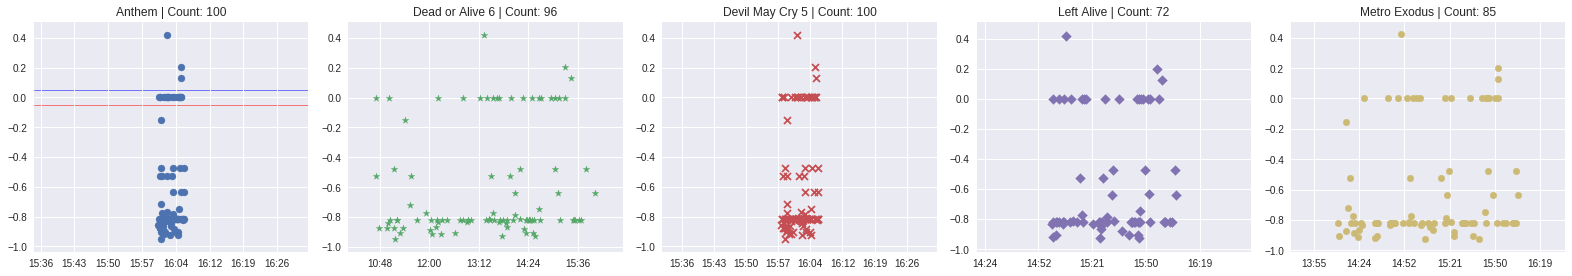

In [64]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(22, 4))

tt1 = matplotlib.dates.date2num(data2[data2.Game=='Anthem'].loc[:,'Tweet time'])
tp1=data2[data2.Game=='Anthem'].loc[:,'compPolarity']
tt2 = matplotlib.dates.date2num(data2[data2.Game=='Dead or Alive 6'].loc[:,'Tweet time'])
tp2=data2[data2.Game=='Dead or Alive 6'].loc[:,'compPolarity']
tt3 = matplotlib.dates.date2num(data2[data2.Game=='Devil May Cry 5'].loc[:,'Tweet time'])
tp3=data2[data2.Game=='Devil May Cry 5'].loc[:,'compPolarity']
tt4 = matplotlib.dates.date2num(data2[data2.Game=='Left Alive'].loc[:,'Tweet time'])
tp4=data2[data2.Game=='Left Alive'].loc[:,'compPolarity']
tt5 = matplotlib.dates.date2num(data2[data2.Game=='Metro Exodus'].loc[:,'Tweet time'])
tp5=data2[data2.Game=='Metro Exodus'].loc[:,'compPolarity']

myFmt = mdates.DateFormatter('%H:%M')

axes[0].set_title("Anthem | Count: "+str(data2[data2.Game=='Anthem'].shape[0]))
axes[0].scatter(tt1, tp1, color='C0')
axes[0].xaxis.set_major_formatter(myFmt)
axes[0].axhline(y=0.05,xmin=0,xmax=3,c="blue",linewidth=0.5,zorder=0)
axes[0].axhline(y=-0.05,xmin=0,xmax=3,c="red",linewidth=0.5,zorder=0)

axes[1].set_title("Dead or Alive 6 | Count: "+str(data2[data2.Game=='Dead or Alive 6'].shape[0]))
axes[1].scatter(tt2, tp2, color='C1', marker='*')
axes[1].xaxis.set_major_formatter(myFmt)

axes[2].set_title("Devil May Cry 5 | Count: "+str(data2[data2.Game=='Devil May Cry 5'].shape[0]))
axes[2].scatter(tt3, tp3, color='C2', marker='x')
axes[2].xaxis.set_major_formatter(myFmt)

axes[3].set_title("Left Alive | Count: "+str(data2[data2.Game=='Left Alive'].shape[0]))
axes[3].scatter(tt4, tp4, color='C3', marker='D')
axes[3].xaxis.set_major_formatter(myFmt)

axes[4].set_title("Metro Exodus | Count: "+str(data2[data2.Game=='Metro Exodus'].shape[0]))
axes[4].scatter(tt5, tp5, color='C4', marker='8')
axes[4].xaxis.set_major_formatter(myFmt)

#axes[0, 1].remove()  # don't display empty ax

fig.tight_layout()
#axes.subplots(sharex=True,sharey=True)

#data2.Game.unique()
#plt.figure()
#plt.scatter(Tweet_time, Tweet_Polarity,c='green',marker='o')
#plt.xlabel('Tweet Time',fontsize=13)
#plt.ylabel('Polarity',fontsize=13)
#plt.gcf().autofmt_xdate()
#myFmt = mdates.DateFormatter('%H:%M:%S')
#plt.gca().xaxis.set_major_formatter(myFmt)
#axes.gca().xaxis.set_major_formatter(myFmt)
#plt.plot(np.unique(Tweet_time), np.poly1d(np.polyfit(Tweet_time, Tweet_Polarity, 1))(np.unique(Tweet_time)))   ---To overplot line on scatter